<h1> <center> Machine Learning<br /> Tarea 2: Máquina de Soporte Vectorial</center> </h1>


 ***

## B.1 Importar librerías

In [ ]:
%matplotlib notebook
import numpy as np
from sklearn.datasets import make_moons, make_classification
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC
import matplotlib.pylab as plt

## B.2 Creacion de datasets

Descomente las lineas 3 y 4, para crear distintos datasets

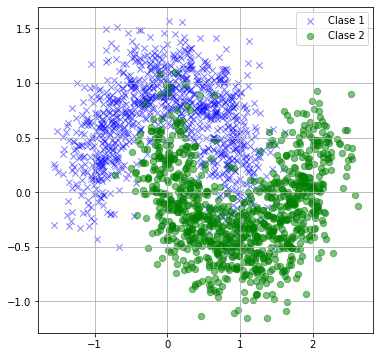

In [ ]:
N = 2000
RUT = 19387907  # Sin digito verificador
#X, Y = make_moons(n_samples=N, noise=0.25)
X, Y = make_classification(n_samples=N, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=2, class_sep=0.5, random_state=RUT)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='b', marker='x', linewidth=1, alpha=0.5, s=40, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='g', marker='o', linewidth=1, alpha=0.5, s=40, label='Clase 2')
plt.grid()
plt.legend()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

## B.3 Support Vector Machine (nu-SVM)

- Seleccione kernel='linear' y ajuste nu $\in [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]$
- Seleccione kernel='rbf', ajuste nu $\in [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]$ y gamma $\in [0.1, 1.0, 10.0, 100.0]$


In [ ]:
Nu = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
gammas = [0.1, 1.0, 10.0, 100.0]

for i in Nu:
  for j in gammas:
    classifier = NuSVC(nu=i, kernel='rbf', gamma=j, probability=True)
    classifier.fit(X_train, Y_train)

    fig = plt.figure(figsize=(9, 8))
    ax = fig.add_subplot(2, 2, 1)
    Y_pred = classifier.predict(X_test)
    clr=np.asarray(['b','g'])
    ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c=clr[Y_pred[Y_test==0]], 
              marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
              linewidth=1, alpha=0.5, s=40, label='Clase 1')
    ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c=clr[Y_pred[Y_test==1]], 
              marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
              linewidth=0, alpha=0.5, s=40, label='Clase 2')
    plt.title('Clasificaci\'on en el conjunto de test')

    ax = fig.add_subplot(2, 2, 3)
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
    ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
    ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
    plt.title('Probabilidad de clasificaci\'on')
    print("Nu: ", i)
    print("Gamma", j)
    
    ax = fig.add_subplot(2, 2, 2)
    Y_pred = classifier.predict_proba(X_test)
    fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
    ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
    print("Area bajo la curva ROC (test): %f" %(auc(fpr, tpr)))
    fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
    ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
    print("Area bajo la curva ROC (train): %f" %(auc(fpr, tpr)))
    plt.legend(loc=4)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('curva ROC')
    plt.grid()

    ax = fig.add_subplot(2, 2, 4)
    ax.scatter(X_train[Y_train==0, 0], X_train[Y_train==0, 1], c='b', 
               marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
    ax.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], c='g', 
               marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
    ax.scatter(X_train[classifier.support_, 0], X_train[classifier.support_, 1], 
               c='r', linewidth=1, alpha=0.25, s=100)
    plt.title('Vectores de soporte')

    plt.tight_layout()
    print("%d SVs para la clase 1" % (classifier.n_support_[0]))
    print("%d SVs para la clase 2" % (classifier.n_support_[1]))

## B.4 Support Vector Machine (C-SVM)

- Seleccione kernel='linear' y ajuste C $\in [0.1, 1.0, 10.0, 100.0]$
- Seleccione kernel='rbf' y ajuste C y gamma $\in [0.1, 1.0, 10.0, 100.0]$


In [ ]:
C = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gammas = [0.1, 1.0, 10.0, 100.0]

for i in C:
  for j in gammas:
    classifier = SVC(C=i, kernel='rbf', gamma=j, probability=True)
    classifier.fit(X_train, Y_train)

    fig = plt.figure(figsize=(9,8))

    ax = fig.add_subplot(2, 2, 1)
    Y_pred = classifier.predict(X_test)
    clr=np.asarray(['b','g'])
    ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c=clr[Y_pred[Y_test==0]], 
               marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
               linewidth=1, alpha=0.5, s=40, label='Clase 1')
    ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c=clr[Y_pred[Y_test==1]], 
               marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
               linewidth=0, alpha=0.5, s=40, label='Clase 2')
    plt.title('Clasificaci\'on en el conjunto de test')

    ax = fig.add_subplot(2, 2, 3)
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
    ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
    ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
    plt.title('Probabilidad de clasificaci\'on')
    print("C: ", i)
    print("Gamma: ", j)
    ax = fig.add_subplot(2, 2, 2)
    Y_pred = classifier.predict_proba(X_test)
    fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
    ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
    print("Area bajo la curva ROC (test): %f" %(auc(fpr, tpr)))
    fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
    ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
    print("Area bajo la curva ROC (train): %f" %(auc(fpr, tpr)))
    plt.legend(loc=4)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('curva ROC')
    plt.grid()

    ax = fig.add_subplot(2, 2, 4)
    ax.scatter(X_train[Y_train==0, 0], X_train[Y_train==0, 1], c='b', 
               marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
    ax.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], c='g', 
               marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
    ax.scatter(X_train[classifier.support_, 0], X_train[classifier.support_, 1], 
               c='r', linewidth=1, alpha=0.25, s=100)
    plt.title('Vectores de soporte')

    plt.tight_layout()
    print("%d SVs para la clase 1" % (classifier.n_support_[0]))
    print("%d SVs para la clase 2" % (classifier.n_support_[1]))

## B.5 Naive Bayes Classifier

Por defecto se usa función de verosimilitud Gaussiana

Area bajo la curva ROC (test): 0.932113
Area bajo la curva ROC (train): 0.946419


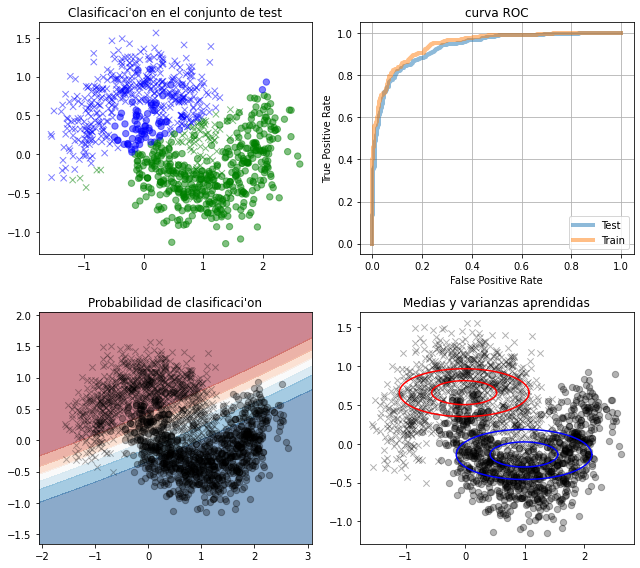

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)


fig = plt.figure(figsize=(9, 8))

ax = fig.add_subplot(2, 2, 1)
Y_pred = classifier.predict(X_test)
clr=np.asarray(['b','g'])
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c=clr[Y_pred[Y_test==0]], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=40, label='Clase 1')
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c=clr[Y_pred[Y_test==1]], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=1, alpha=0.5, s=40, label='Clase 2')
plt.title('Clasificaci\'on en el conjunto de test')

ax = fig.add_subplot(2, 2, 4)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.3, s=40, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=1, alpha=0.3, s=40, label='Clase 2')
for mu, sigma, c in zip(classifier.theta_, classifier.sigma_, ['r', 'b']):
    ax.plot(mu[0] + sigma[0]*np.cos(2.0*np.pi*np.linspace(0, 1, num=100)),
           mu[1] + sigma[1]*np.sin(2.0*np.pi*np.linspace(0, 1, num=100)), c)
    ax.plot(mu[0] + 2*sigma[0]*np.cos(2.0*np.pi*np.linspace(0, 1, num=100)),
           mu[1] + 2*sigma[1]*np.sin(2.0*np.pi*np.linspace(0, 1, num=100)), c)
plt.title('Medias y varianzas aprendidas')

ax = fig.add_subplot(2, 2, 3)
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.3, s=40, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=1, alpha=0.3, s=40, label='Clase 2')
plt.title('Probabilidad de clasificaci\'on')

ax = fig.add_subplot(2, 2, 2)
Y_pred = classifier.predict_proba(X_test)
fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area bajo la curva ROC (test): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area bajo la curva ROC (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('curva ROC')
plt.grid()
plt.tight_layout()